<img src="logo.png">

# Contraste de igualdad de varias medias

Supongamos que tenemos una muestra de tamaño $n$ de una variable aleatoria $p$-dimensional $\boldsymbol{X=[x_1,x_2,...,x_p]}$. Digamos que esta muestra se puede clasificar en $G$ grupos de tamaño $n_1,n_2,...,n_G$. Por lo tanto $n_1+n_2+...+n_G=n$.

Asumamos que cada grupo sigue una normal, y todos los grupos tienen la misma varianza $\Sigma$. Nos interesa saber si todos los grupos tienen la misma media poblacional:

$$\left\{\begin{array}{c}H_0:\vec{\mu_1},\vec{\mu_2},...,\vec{\mu_G}=\vec{\mu_0}\\H_1:\mbox{no todas son iguales}\end{array}\right.$$

Este problema también se conoce como **análisis de varianza multivariante.** 

En este caso tenemos $L(H_0)=-\frac{n}{2}\log|S|-\frac{np}{2}$ y, para $H_1$ debemos considerar los grupos en que clasificamos la muestra, de donde se obtiene $L(H_1)=-\frac{n}{2}\log|S_W|-\frac{np}{2}$ donde $$S_W=\frac{1}{n}\sum_{g=1}^G\sum_{h=1}^{n_g}(x_{h,g}-\overline{x_g})(x_{h,g}-\overline{x_g})^T$$ 

De esta manera, $\lambda=n\log\left(\frac{|S|}{|S_W|}\right)$. Como siempre, rechazamos $H_0$ cuando $\lambda$ sea suficientemente grande. Es decir, cuando la variabilidad suponiendo que todas las medias son iguales, medida por $|S|$, sea mucho mayor que la variabilidad cuando permitimos que las medias de los grupos sean distintas, medida por $|S_W|$.

Su distribución, para $n$ grande, es una chi cuadrada con $p(G-1)$ grados de libertad.


**Ejemplo.** Tomemos la tabla de iris. Por lo tanto $n=150$, $p=4$ y $G=3$ (hay tres grupos). Además $n_1=n_2=n_3=50$. El contraste que haremos será

$$\left\{\begin{array}{c}H_0:\vec{\mu_1},\vec{\mu_2},\vec{\mu_3}=\vec{\mu_0}\\H_1:\mbox{no todas son iguales}\end{array}\right.$$

In [1]:
## x1=largo del sépalo; x2=ancho del sépalo; x3=largo del pétalo; x4=ancho del pétalo
n=150
p=4
G=3
n1=50
n2=50
n3=50

Calculemos el vector de medias muestrales de cada grupo:

In [2]:
setosa <- iris[iris$Species == "setosa", ]
versicolor <- iris[iris$Species == "versicolor",]
virginica <- iris[iris$Species == "virginica",]

In [4]:
dim(virginica)

[1] 50  5

In [5]:
medias_setosa = colMeans(setosa[,1:4])
medias_versicolor = colMeans(versicolor[,1:4])
medias_virginica = colMeans(virginica[,1:4])

medias_setosa
medias_versicolor
medias_virginica


Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       5.006        3.428        1.462        0.246

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       5.936        2.770        4.260        1.326

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       6.588        2.974        5.552        2.026

Calculamos $S$ y $S_W$

In [6]:
S = cov(iris[,1:4])
S

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.6856935,-0.0424340,1.2743154,0.5162707
Sepal.Width,-0.0424340,0.1899794,-0.3296564,-0.1216394
Petal.Length,1.2743154,-0.3296564,3.1162779,1.2956094
Petal.Width,0.5162707,-0.1216394,1.2956094,0.5810063


In [8]:
SW = ((n1-1)*cov(setosa[,1:4]) + (n2-1)*cov(versicolor[,1:4]) + (n3-1)*cov(virginica[,1:4]))/n
SW



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.25970800,0.09086667,0.16416400,0.03763333
Sepal.Width,0.09086667,0.11308000,0.05413867,0.03205600
Petal.Length,0.16416400,0.05413867,0.18148400,0.04181200
Petal.Width,0.03763333,0.03205600,0.04181200,0.04104400


$cov(tabla)=\frac{1}{n-1}\sum_{j=1}^n(x_{i}-\overline{x})^2$; entonces $$(n-1)cov(tabla)=\sum_{j=1}^n(x_{i}-\overline{x})^2$$

Calculamos $\lambda=n\log\left(\frac{|S|}{|S_W|}\right)$

In [9]:
lambda = n * log(det(S)/det(SW))
lambda

[1] 567.0189

Finalmente elegimos el valor de significación $\alpha$ (recordemos que $NC+\alpha=1$). En este ejemplo tomemos $\alpha=0.01$



In [11]:
alpha = 0.01

umbral = qchisq(alpha,p*(G-1))
umbral

[1] 1.646497

Como $\lambda>>\mbox{umbral}$, rechazamos $H_0$.

Gráficamente podemos ver las medias deben ser diferentes. Con el contraste vimos analíticamente que esto es cierto.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

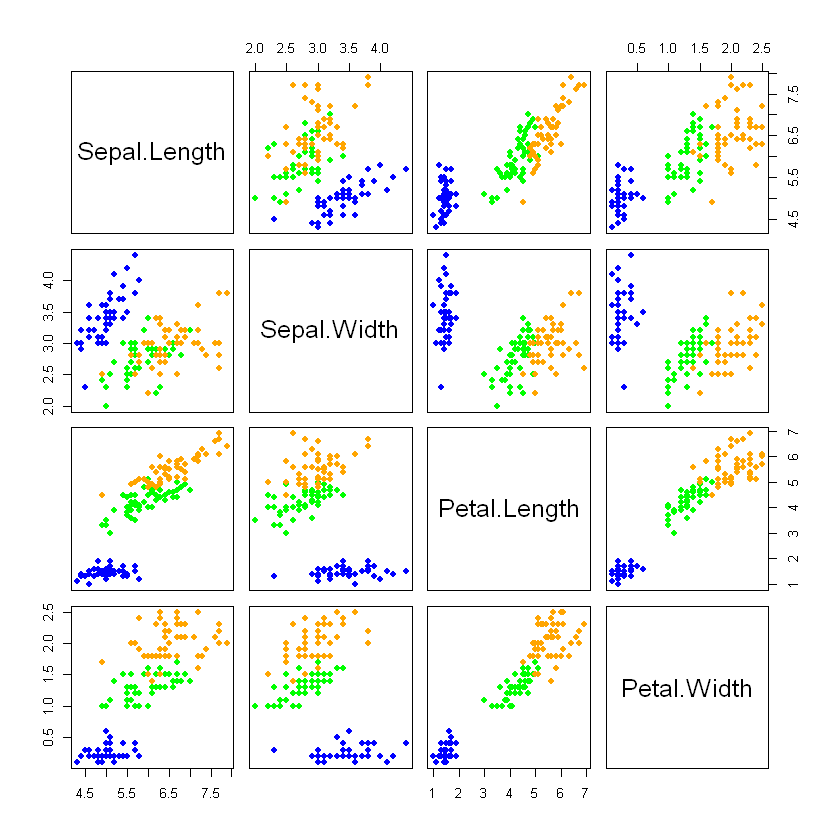

In [12]:
library(ggplot2)
pairs(iris[,1:4],pch=19,col=c("blue","green","orange")[iris[,5]])

In [14]:
S = cov(iris[,1:4])
S

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.6856935,-0.0424340,1.2743154,0.5162707
Sepal.Width,-0.0424340,0.1899794,-0.3296564,-0.1216394
Petal.Length,1.2743154,-0.3296564,3.1162779,1.2956094
Petal.Width,0.5162707,-0.1216394,1.2956094,0.5810063


Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.6856935    0.1899794    3.1162779    0.5810063

[1] 4.572957